In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df=pd.read_csv("supermarket_sales - Sheet1.csv")
df.head();

In [3]:
df["Date"]=df["Date"].map(lambda x: dt.datetime.strptime(x,("%m/%d/%Y")))
df["Time"]=df["Time"].map(lambda x: dt.datetime.strptime(x,("%H:%M")))
df["datetime"]=df["Date"].map(lambda x: str(x))
df["time"]=df["Time"].map(lambda x: str(x))
for i in range (0,1000):
    df.loc[i,"datetime"]=df.loc[i,"datetime"].replace("00:00:00", str(df.loc[i,"time"])[-8:])
df=df.drop(columns=["Date","Time"])
df["hour"]=df["datetime"].map(lambda x: str(x)[-8:-6])

In [4]:
for i in range(0,1000):
    df.loc[i,"datetime"]=dt.datetime.strptime(df.loc[i,"datetime"], ("%Y-%m-%d %H:%M:%S"))

In [5]:
df=df.sort_values("datetime")

In [6]:
df.reset_index(inplace=True)

In [7]:
df=df.drop(columns="index")

In [8]:
df.columns=df.columns.str.replace(' ','_')

In [9]:
ncol=df.shape[1]
print('dimensions are' + str(df.shape))

dimensions are(1000, 18)


In [10]:
def uniquevaluefinder(frame, ncol):    
    global unique_value_counts_list
    unique_value_counts_list=[None]*(ncol)
    for i in range (0,(ncol)):
        unique_value_counts_list[i]=len(frame.iloc[:,i].value_counts())
    print(unique_value_counts_list)

In [11]:
uniquevaluefinder(df,ncol);

[1000, 3, 3, 2, 2, 6, 943, 10, 990, 990, 3, 990, 1, 990, 61, 994, 506, 11]


In [12]:
condition=np.array(unique_value_counts_list)<=20
dictionary_map_mediate=list(np.where(condition==True))
dictionary_map=list(dictionary_map_mediate[0])
dictionary_map

[1, 2, 3, 4, 5, 7, 10, 12, 17]

In [13]:
def dictmaker(data, column):
    name=data.columns[column]
    series=data.iloc[:,column].value_counts().keys()
    global temp_series
    temp_series=pd.Series(series).to_dict()
    exec (name +'dict =temp_series', globals())
    print(name)

In [14]:
def dictmakermeta(data, mapped_positions):
    for i in range (0,len(mapped_positions)):
        dictmaker(data=data, column=mapped_positions[i]);
dictmakermeta(data=df, mapped_positions=dictionary_map);

Branch
City
Customer_type
Gender
Product_line
Quantity
Payment
gross_margin_percentage
hour


In [15]:
conditions=[[None]*(len(eval(df.columns[dictionary_map[0]] + 'dict')))]
for i in range(1,len(dictionary_map)):
    len(eval(df.columns[dictionary_map[i]] + 'dict'))
    conditions=conditions+[[None]*(len(eval(df.columns[dictionary_map[i]] + 'dict')))]
conditions;

In [16]:
for i in range (0,len(dictionary_map)):
    for j in range (0,(len(conditions[i]))):
        conditions[i][j]=str(df.columns[dictionary_map[i]])+'cond'+ str(j) 

In [17]:
for i in range (0,len(dictionary_map)):
    for j in range (0,(len(conditions[i]))):
        b=df[df.columns[dictionary_map[i]]]==eval(df.columns[dictionary_map[i]] + 'dict[j]')  
        exec(str(conditions[i][j]) + '= b') 

In [18]:
condition=conditions[0]
for i in range (1,len(conditions)):
    condition=condition+conditions[i]

In [19]:
df["visit"]=1
for i in range (0,999):
    df.loc[i+1,"timedelta"]=df.loc[i+1,"datetime"]-df.loc[i,"datetime"]

In [20]:
df.loc[0,"timedelta"]=0
df.loc[0,"timedelta"]=dt.timedelta(df.loc[0,"timedelta"])

In [21]:
df["timedelta"]=df["timedelta"].map(lambda x: x.total_seconds())

In [22]:
df["cumsum"]=df["timedelta"].cumsum()

In [23]:
opening_time=min(list(hourdict.values()))
closing_time=max(list(hourdict.values()))

In [24]:
print('opening time is '+str(opening_time)+ ':00')
print('closing time is '+str(closing_time)+ ':00')

opening time is 10:00
closing time is 20:00


In [25]:
def mw_ratio_finder():
    global ab1, ab2
    ab1=df[eval(condition[9])]
    ab2=df[eval(condition[8])]
    ab1=ab1[["cumsum","visit"]]
    ab2=ab2[["cumsum","visit"]]
    ab1.set_index("cumsum", inplace=True)
    ab2.set_index("cumsum", inplace=True)
    ab1.reset_index(inplace=True);
    ab2.reset_index(inplace=True);
    shape1=ab1.shape[1]
    shape2=ab2.shape[1]
    lambdawomen=(ab1["visit"].cumsum()[shape1])/(ab1["cumsum"][shape1])
    lambdamen=(ab2["visit"].cumsum()[shape2])/(ab2["cumsum"][shape2])
    lambdawomen=lambdawomen*60*60*24
    lambdamen=lambdamen*60*60*24
    mw_visit_ratio=lambdamen/lambdawomen
    print('men visit supermarkets '+ str(round(mw_visit_ratio, 2)) + ' times as much as women')
mw_ratio_finder()

men visit supermarkets 1.27 times as much as women


In [26]:
def wm_spend_ratio():
    global ab1, ab2
    ab1=df[eval(condition[9])]
    ab2=df[eval(condition[8])]
    ab1.reset_index(inplace=True)
    ab2.reset_index(inplace=True)
    shape1=ab1.shape[1]
    shape2=ab2.shape[1]
    ab1.drop(columns="index");
    ab2.drop(columns="index");
    women_spend_total=ab1["Total"].sum()
    men_spend_total=ab2["Total"].sum()
    women_spend=women_spend_total/(ab1["cumsum"][shape1])
    men_spend=men_spend_total/(ab2["cumsum"][shape2])
    print('women spend ' + str(round((women_spend/men_spend),2)) + ' times as much as men')
wm_spend_ratio()

women spend 0.8 times as much as men


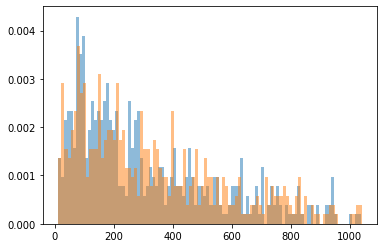

In [36]:
plt.hist(ab1["Total"], bins=100, density='True', alpha=0.5);
plt.hist(ab2["Total"], bins=100, density='True', alpha=0.5);

In [39]:
central_tendencywomen=ab1["Total"].sum()/ab1["visit"].sum()
central_tendencymen=ab2["Total"].sum()/ab2["visit"].sum()
print('women spend on average ' + str("%.2f" % round(central_tendencywomen,2)) + ' yuen per visit')
print('men spend on average ' + str("%.2f" % round(central_tendencymen,2)) + ' yuen per visit')

women spend on average 310.79 yuen per visit
men spend on average 335.10 yuen per visit


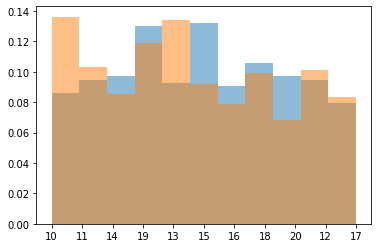

In [43]:
plt.hist(ab1["hour"], bins=11, density='True', alpha=0.5);
plt.hist(ab2["hour"], bins=11, density='True', alpha=0.5);

Women Prefer to shop earlier in the day relative to men